In [74]:
data = pd.read_csv('dataset/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [75]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [76]:
data.drop(['id', 'Unnamed: 32'], axis=1, inplace = True)

y = data['diagnosis']
X = data.drop(['diagnosis'], axis=1)

Number of Benign:  357
Number of Malignant :  212


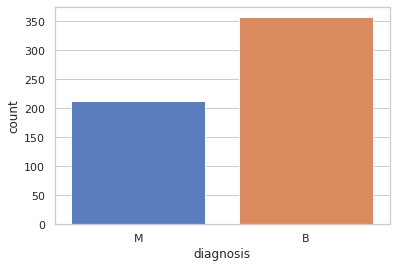

In [77]:
import seaborn as sns

ax = sns.countplot(y,label="Count")
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

# Data Visualization
Here we are going to visualize in 3 differnt ways and then we will move to feature selection
- Violin Plot
- Swarm Plot
- Heatmap

In [78]:
# Standerization
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

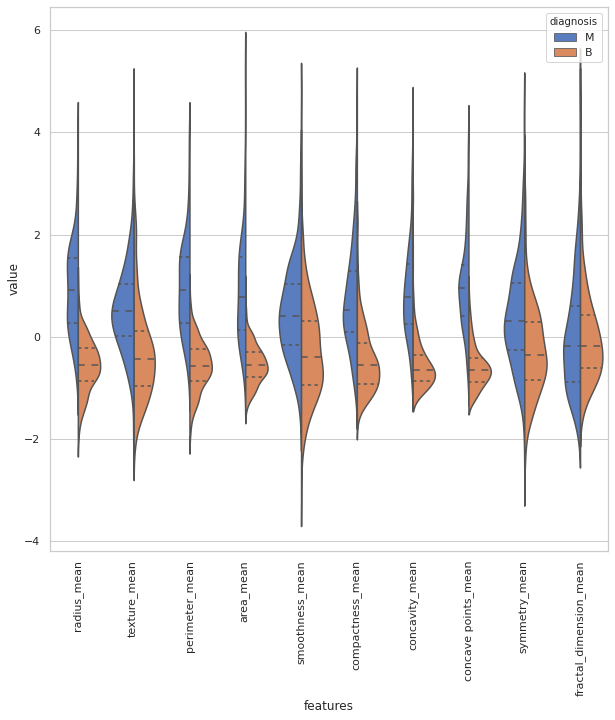

In [79]:
import matplotlib.pyplot as plt

# Violin Plot
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

From this distribution of violin plot, we can say that, the feature named 'fractal_dimension_mean' may not be useful for final feature selection!

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

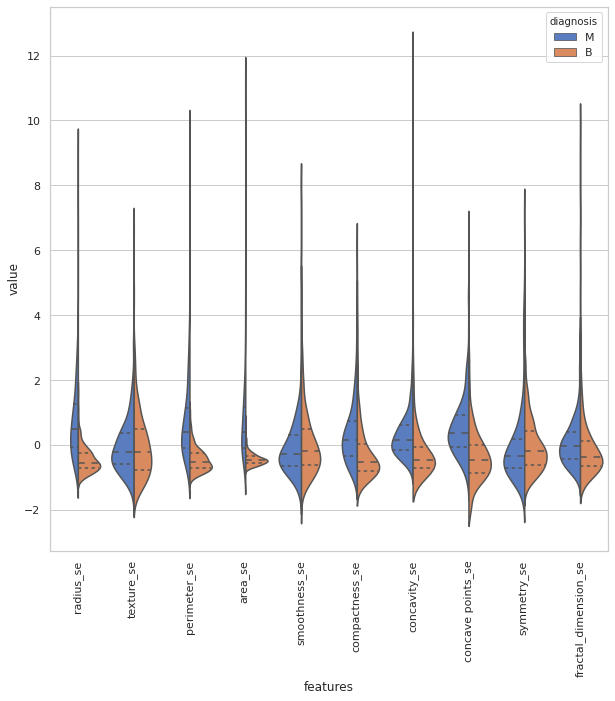

In [80]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

From this plot, we can conclude, 'texture_se', 'smoothness_se' and 'symmetry_se' may not be useful for final features selection!

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

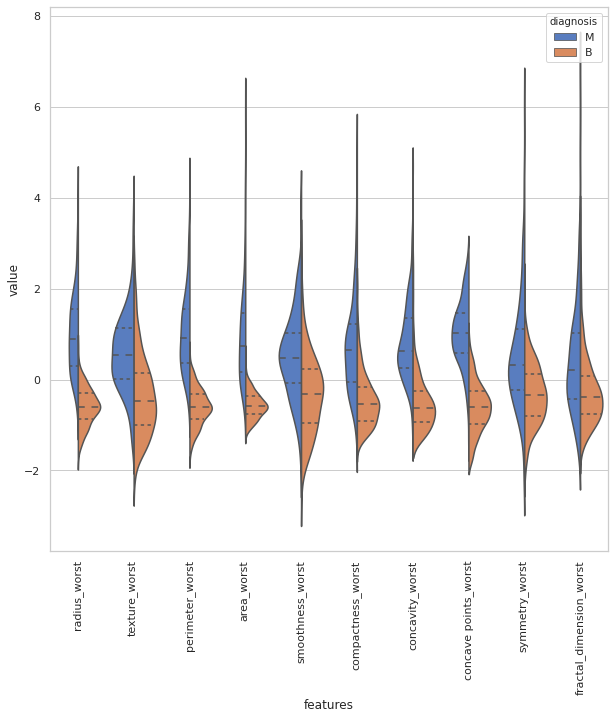

In [81]:
data = pd.concat([y,data_n_2.iloc[:,20:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In [82]:
# Standerization
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

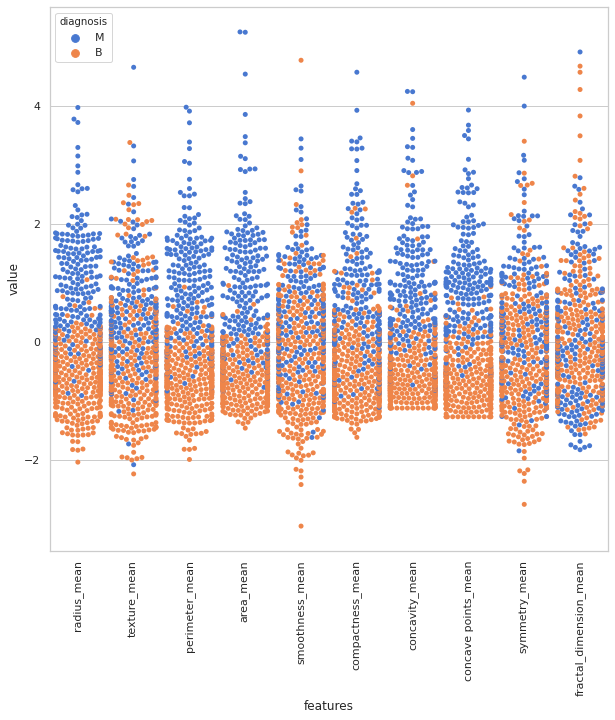

In [83]:
import time

# Swarm Plot
sns.set(style="whitegrid", palette="muted")
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

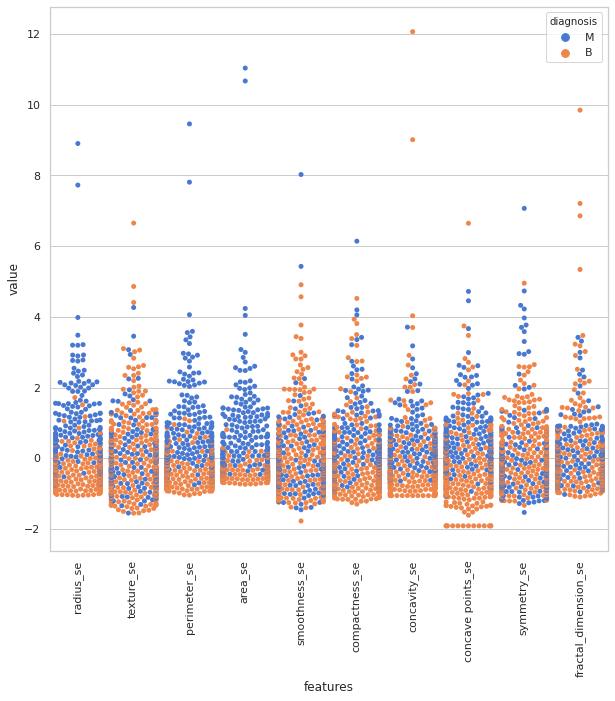

In [84]:
sns.set(style="whitegrid", palette="muted")
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

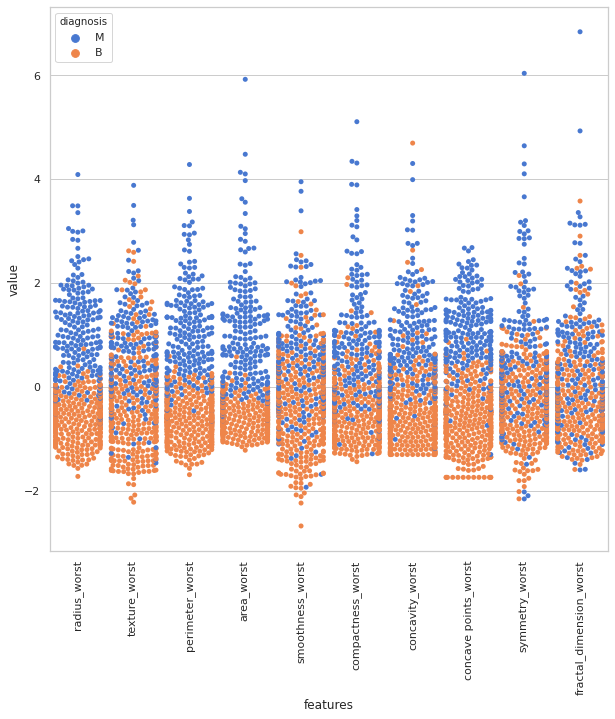

In [85]:
sns.set(style="whitegrid", palette="muted")
data = pd.concat([y,data_n_2.iloc[:,20:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

# Features Selection

In this part we will select feature with different methods that are feature selection with correlation, recursive feature elimination with cross validation (RFECV) and tree based feature selection. We will use random forest classification in order to train our model and predict.

# 1) Feature selection with correlation and random forest classification

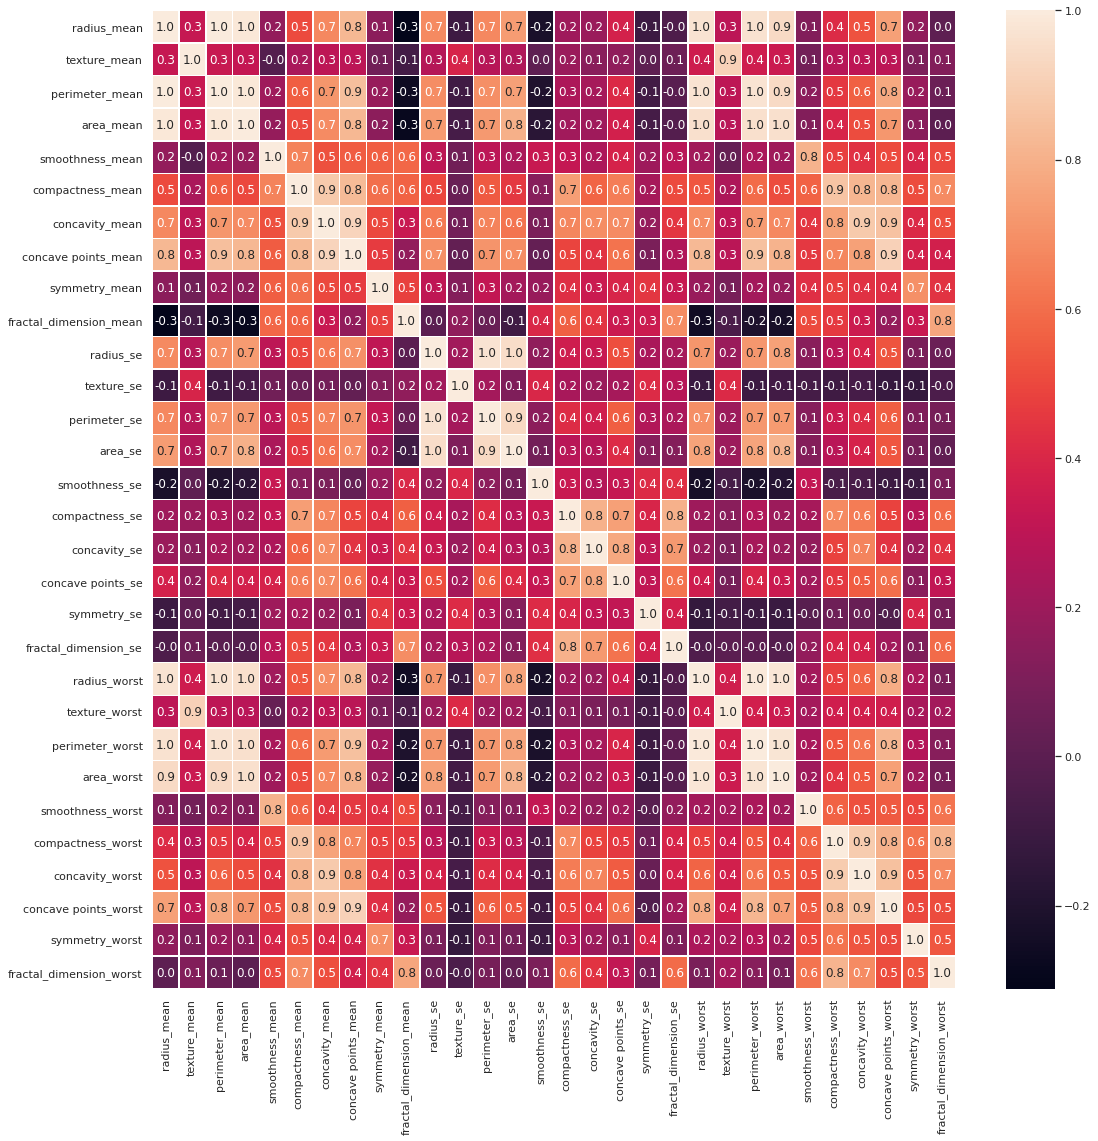

In [86]:
# Heatmap
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Ok, so cool!!! 

From here we have to reduce the inter-linked feature. 

But firstly we have to know why we have to drop the inter-linked columns? 

The simpliest answer is, if we don't drop those inter-linked columns and just put one column from those columns to our final dataframe, then it will cause multi-correlation, which will reduce the accuracy of the model!!!

- 'radius_mean' is linearly related with 'perimeter_mean', 'perimeter_mean' is linearly related with 'area_mean' and 'area_mean' also linearly dependent with 'radius_mean'. So 'radius_mean', 'perimeter_mean' and 'area_mean' are interlinked! and we will drop 'perimeter_mean' and 'area_mean'.
- Similarly, we will delete 'radius_se' and 'area_se', and 'perimeter_se' will be selected for final features
- SImilarly, 'radius_worst' will be selected for final feature selection!

Similarly more features are being examined and unnessecary features are listed into the list below named as 'unnessecary_features'

In [87]:
unnessecary_features = ['perimeter_mean', 'area_mean', 
                        'radius_se', 'area_se', 
                        'perimeter_worst', 'area_worst', 
                        'compactness_mean', 'concavity_mean',
                        'compactness_se','concave points_se',
                        'compactness_worst','concave points_worst',
                        'texture_worst', 'radius_worst']

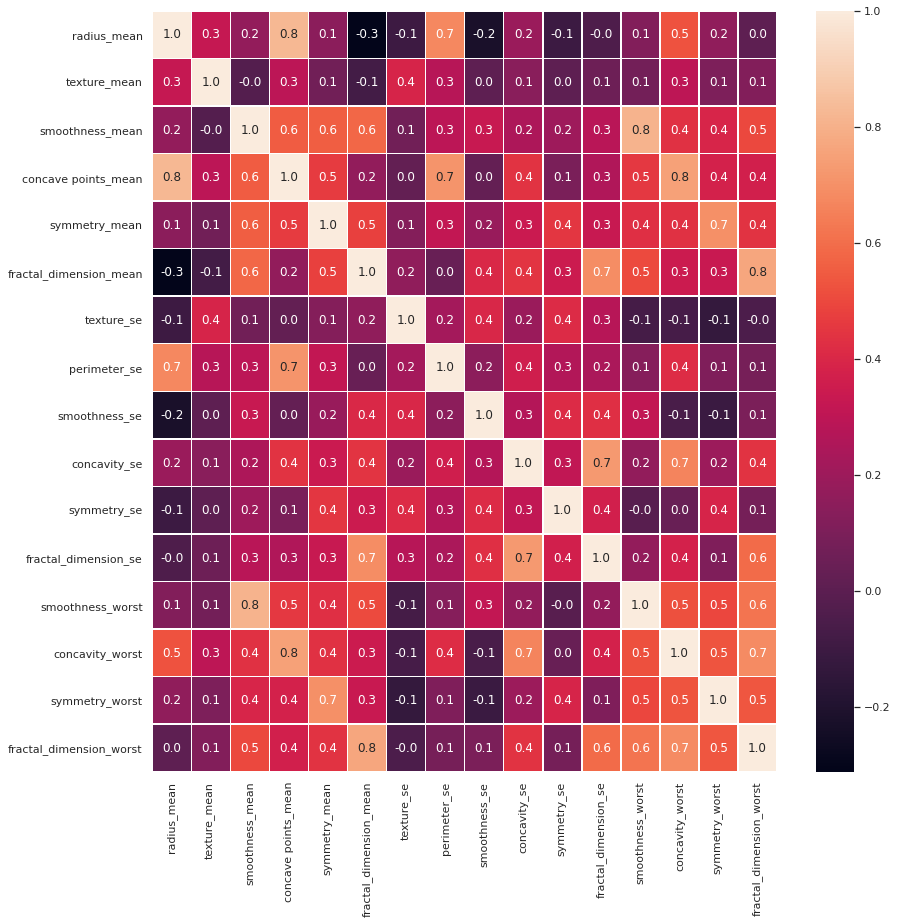

In [88]:
x_1 = X.drop(unnessecary_features, axis = 1 ) 
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

It seems good!!!

## Train Test Split

In [89]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)

Accuracy is:  0.9649122807017544


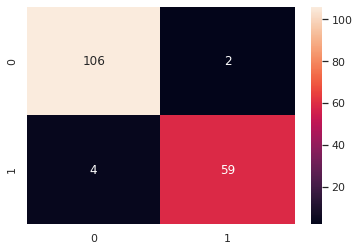

In [91]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

# 2) RFECV and random forest classification

In [92]:
from sklearn.feature_selection import RFECV

clf_rf_2 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_2, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 7
Best features : Index(['radius_mean', 'texture_mean', 'concave points_mean', 'perimeter_se',
       'concavity_se', 'concavity_worst', 'symmetry_worst'],
      dtype='object')


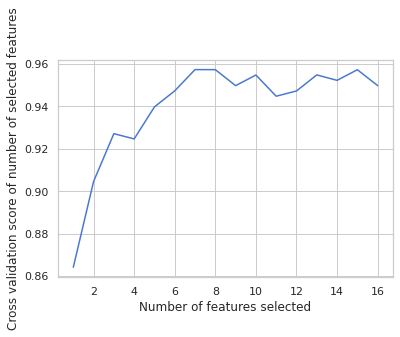

In [93]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

By RFECV, we came across that:

['radius_mean', 'texture_mean', 'concave points_mean', 'perimeter_se',
       'concavity_se', 'smoothness_worst', 'concavity_worst',
       'symmetry_worst']
       
these features are enough to achieve high accuracy!!!

# 3) Tree based feature selection and random forest classification

In [94]:
clf_rf_3 = RandomForestClassifier()      
clr_rf_3 = clf_rf_3.fit(x_train,y_train)
importances = clr_rf_3.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 3 (0.312000)
2. feature 0 (0.207615)
3. feature 13 (0.120192)
4. feature 7 (0.101805)
5. feature 1 (0.051117)
6. feature 9 (0.036018)
7. feature 14 (0.034195)
8. feature 12 (0.021078)
9. feature 15 (0.017652)
10. feature 2 (0.017233)
11. feature 11 (0.015853)
12. feature 5 (0.014667)
13. feature 8 (0.013920)
14. feature 4 (0.013354)
15. feature 10 (0.012347)
16. feature 6 (0.010954)


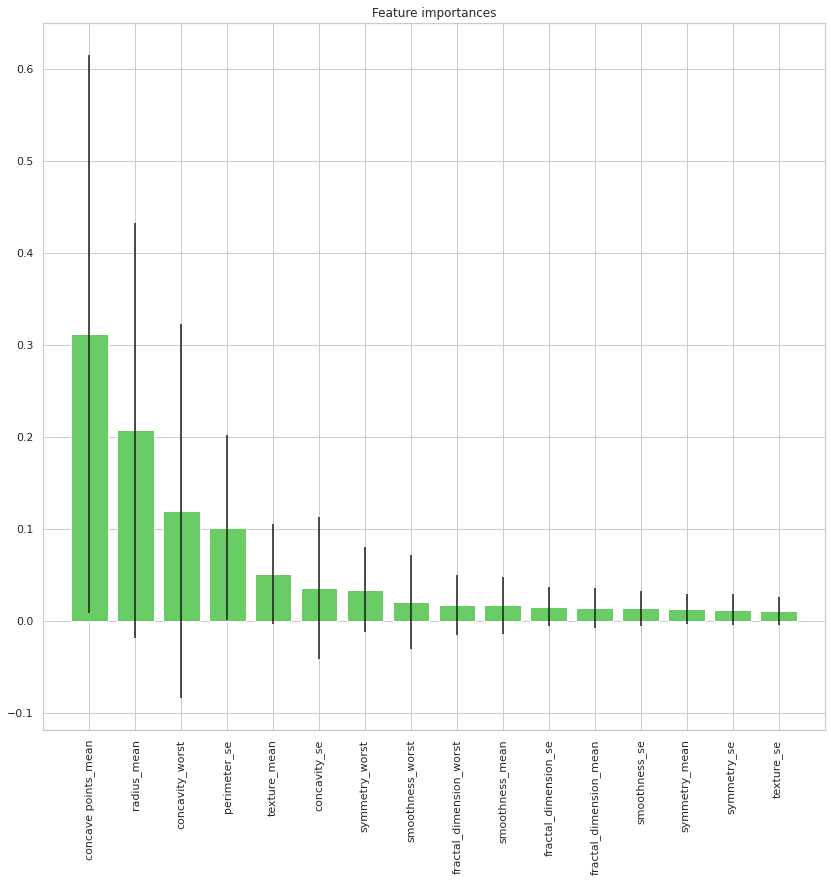

In [95]:
# Plot the feature importances of the forest
plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

This plot is also saying that, first 8 features are more important than others!!!

In [96]:
most_important_features = ['radius_mean', 'texture_mean', 'concave points_mean', 'perimeter_se',
       'concavity_se', 'smoothness_worst', 'concavity_worst',
       'symmetry_worst']

not_too_important_features = list(set(list(X.columns))-set(most_important_features))

In [97]:
X_most_important = X.drop(not_too_important_features, axis=1)

In [98]:
x_train, x_test, y_train, y_test = train_test_split(X_most_important, y, test_size=0.3, random_state=42)

In [99]:
model = RandomForestClassifier(random_state=43)      
model = model.fit(x_train,y_train)

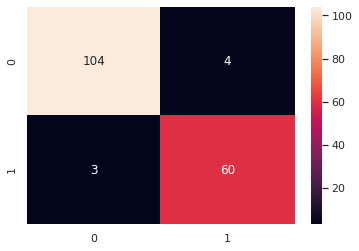

In [100]:
cm = confusion_matrix(y_test,model.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [101]:
ac = accuracy_score(y_test,model.predict(x_test))
print('Accuracy is: ',ac)

Accuracy is:  0.9590643274853801


As Feature Selection with correlation was giving the best accuracy, thus will will use it as final model!!!

# Accuracy Of Final Model:
## So by doing the Feature Selection With Correlation & Random Forest Classification, we got the best accuracy, i.e. *96.49%*

# User Friendly Use-case

In [107]:
x_final = X.drop(unnessecary_features, axis = 1 )

model = RandomForestClassifier(random_state=43)      
model = model.fit(x_final, y)

In [108]:
def get_inputs():
    all_inputs = []
    
    # Mean -> mean of distances from center to points on the perimeter
    temp = float(input("Enter Radius Mean : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Texture Mean : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Perimeter Mean : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Area Mean : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Smoothness Mean : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Compactness Mean : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Concavity Mean : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Concave Points Mean : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Symmetry Mean : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Fractal Dimension Mean : "))
    all_inputs.append(temp)
    
    # SE -> Standard Error
    temp = float(input("Enter Radius SE : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Texture SE : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Perimeter SE : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Area SE : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Smoothness SE : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Compactness SE : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Concavity SE : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Concave Points SE : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Symmetry SE : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Fractal Dimension SE : "))
    all_inputs.append(temp)
    
    # Worst -> largest mean value for mean of distances from center to points on the perimeter
    temp = float(input("Enter Radius Worst : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Texture Worst : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Perimeter Worst : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Area Worst : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Smoothness Worst : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Compactness Worst : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Concavity Worst : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Concave Points Worst : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Symmetry Worst : "))
    all_inputs.append(temp)
    
    temp = float(input("Enter Fractal Dimension Worst : "))
    all_inputs.append(temp)
    
    return all_inputs

In [109]:
if __name__=="__main__":
    print("Enter 'Y' or 'y' to test the model with your dataset, or press any key to quit!")
    print("===============================================================================")
    run = input("Enter Your Choice : ")
    while run.lower()=='y':
        test_x = get_inputs()
        prediction = model.predict(test_x)
        if prediction=='M':
            print("Acconding To The Model, The Diagnosis Of Breast Tissues Is MALIGNANT!!!")
        else:
            print("Acconding To The Model, The Diagnosis Of Breast Tissues Is BENIGN!!!")
        print("Enter 'Y' or 'y' to test the model with your dataset, or press any key to quit!")
        print("===============================================================================")
        run = input("Enter Your Choice")

Enter 'Y' or 'y' to test the model with your dataset, or press any key to quit!
Enter Your Choiceno
